# 04_savgol_central_difference_derivative_smoothing

- Compute derivatives with central differences from noisy data and apply Savitzky–Golay smoothing.


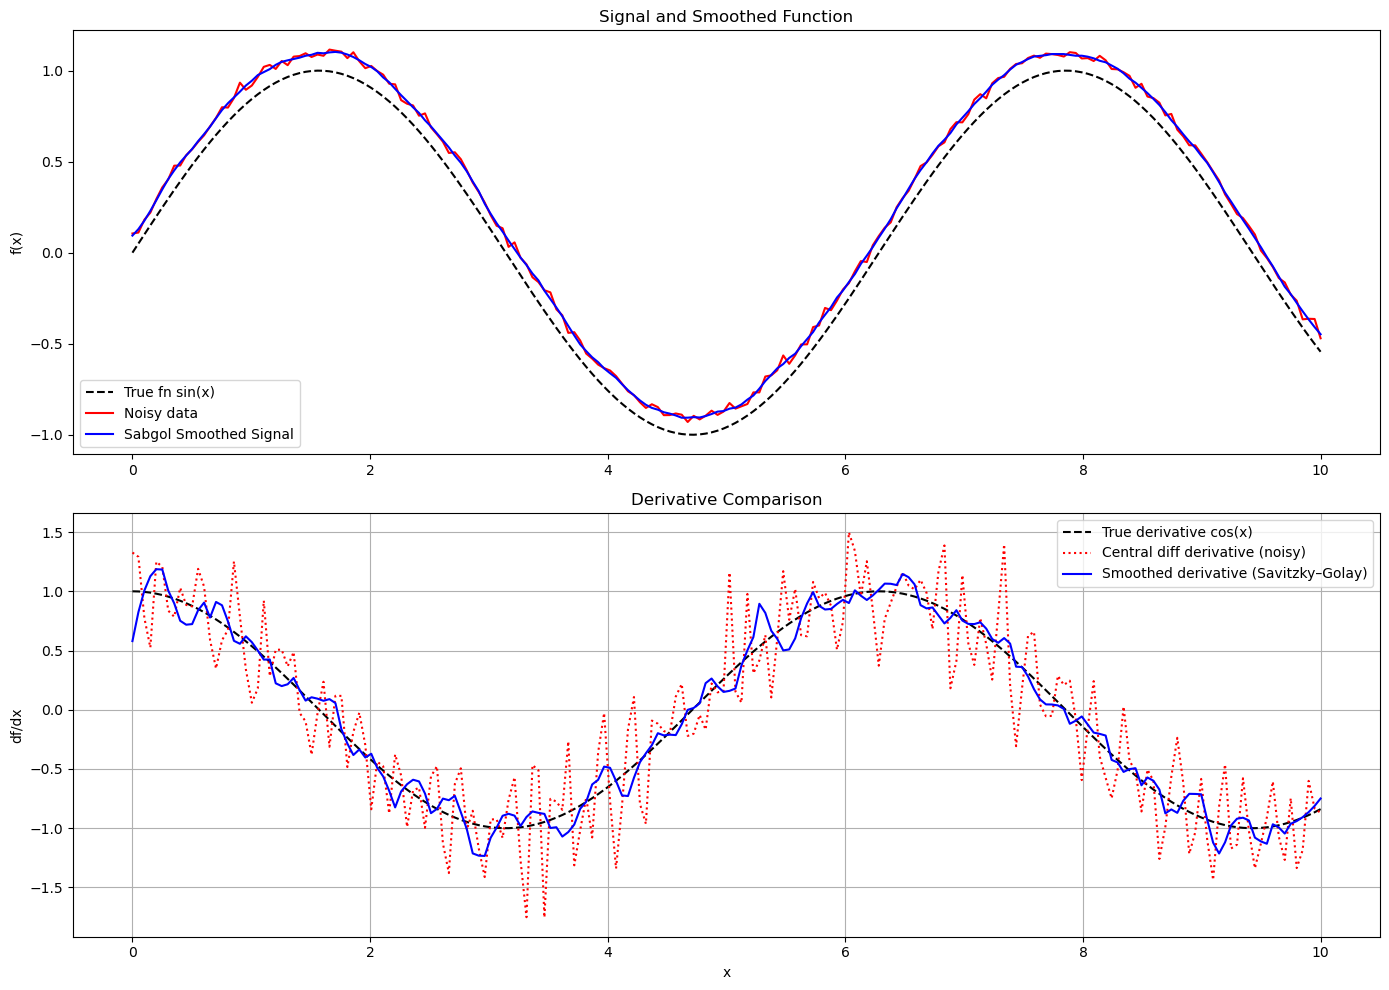

Discussion:
- The noisy derivative fluctuates strongly due to noise amplification during differentiation.
- The Savitzky–Golay smoothing filter provides a much cleaner derivative while preserving shape.
- The blue smoothed derivative closely follows the true derivative cos(x), showing effective noise reduction.


In [ ]:
# Generating data

import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
dx = x[1] - x[0]

funcx_true = np.sin(x)
noise = np.random.normal(1, 0.2, size=len(x))
funcx_noisy = np.sin(x) + 0.1*noise

df = np.gradient(funcx, x)
df_true = np.cos(x)

# Savitzky–Golay smoothing
smoothed_f = savgol_filter(funcx_noisy, window_length=11, polyorder=3)
smoother_df = savgol_filter(funcx_noisy, window_length=11, polyorder=3, deriv=1, delta=dx)

# Plotting Results

plt.figure(figsize=(14, 10))

# Signal smoothing
plt.subplot(2, 1, 1)
plt.plot(x, funcx_true, 'k--', label='True fn sin(x)')
plt.plot(x, funcx_noisy, 'r', label='Noisy data')
plt.plot(x, smoothed_f, 'b', label='Sabgol Smoothed Signal')
plt.legend()
plt.ylabel('f(x)')
plt.title('Signal and Smoothed Function')

# Derivative comparison
plt.subplot(2, 1, 2)
plt.plot(x, df_true, 'k--', label='True derivative cos(x)')
plt.plot(x, df, 'r:', label='Central diff derivative (noisy)')
plt.plot(x, smoother_df, 'b', label='Smoothed derivative (Savitzky–Golay)')
plt.legend()
plt.xlabel('x')
plt.ylabel('df/dx')
plt.title('Derivative Comparison')

plt.tight_layout()
plt.show()

# Discussion
print("Discussion:")
print("- The noisy derivative fluctuates strongly due to noise amplification during differentiation.")
print("- The Savitzky–Golay smoothing filter provides a much cleaner derivative while preserving shape.")
print("- The blue smoothed derivative closely follows the true derivative cos(x), showing effective noise reduction.")
